# TP ALOHA - CSMA pour TELECOM204

**Student Version**

25 Mai 2020  (Enseignant: Anastasios GIOVANIDIS)

Link to run the code in Google Colab [![Google Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=terminal)](https://colab.research.google.com/drive/1dhZcgovSzyLO0kSNESE-6eB0hUx9yOUn?usp=sharing)

L'objectif de ces travaux partiques est de vérifier par simulation les résultats analytiques vus en cours sur les performances des algorithmes d'accès aléatoire. À chaque section correspond un canevas de code en Python.
Vous devez remplir les parties de code manquantes et exécuter le programme obtenu, comme indiqué.

**Résultats.** 

Notez les fonctions complétées et les résultats obtenus au fur et à mesure. 

Le code rempli avec vos reponses est à envoyer en format Jupyter-notebook (.ipynb) avant le **01 Juin 2020, 23h59** à mon adresse mail:

anastasios.giovanidis@lip6.fr

avec votre nom comme nom de fichier: votrenom.pdf

**Votre NOM Prenom ici:**

In [1]:
import numpy as np
from numpy.random import binomial
import matplotlib.pyplot as plt

## Exercise 1: ALOHA synchrone

On s'intéresse d'abord à la performance du protocole d'accès aléatoire ALOHA synchrone. On considère $N$ stations partageant un meme canal de transmission. Chaque station est supposée d'avoir un nombre infini de paquets à transmettre. 

Dans le protocole ALOHA les transmissions sont aveugles et chaque station émet indépendamment de l'état des autres stations. Par convention, la durée d'un slot est alors égale au temps de transmission d'un paquet. 

Dans chaque slot, chaque station émet avec une probabilité fixe $p$, indépendamment des autres stations. En mode synchrone, un slot est utile si et seulement si une seule station émet sur ce slot. 

1. Quelle est la probabilité qu'un slot soit utile?

2. Quelle est la probabilité d'emission optimale, $p^*$?

3. En vue des deux questions précedentes, quel est le taux d'utilisation atteint par ALOHA synchrone?

Evaluez aussi les reponses 2,3 pour le cas $N=5$.

**Answer 1,2,3**

your answers here

4. Complétez le programme de simulation permettant d'estimer le taux d'utilisation (throughput) atteint par ALOHA synchrone.

In [2]:
#Parameters
N = 5                #total number of users
p_test = 0.1         #an example value for the probability p
#
# Simulation Time
t_max = 10000        #simulation time in number of slots
t_vec = np.arange(0,t_max)
#
# A vector of probability choices
p_step = 0.01                            #probability step
p_vec = np.arange(0,1+p_step,p_step)     #Vector of values for the transmission probability
#

In [3]:
# Initialize global
throughput = list()  #resulting throughput vector
#
for p in p_vec:
    # Initialize local
    nb_packets = 0       #cumulative number of successfully transmitted packets
    for t in t_vec:
        ###
        ### your code here
        ###
    #
    u = nb_packets/t_max
    throughput.append(u)

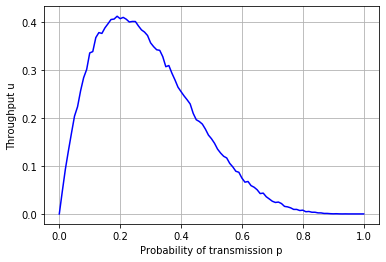

In [4]:
plt.plot(p_vec, throughput, 'b-')
plt.xlabel('Probability of transmission p')
plt.ylabel('Throughput u')
plt.grid()
plt.show()

In [5]:
#p_opt = ?

5. Comparez les résultats analytiques avec eux des simulations, concernant le taux d'utilisation.

**Answer 5**

your answer here

6. Expliquez les résultats obtenus pour $N=5$ stations et différentes valeurs de $p$.

your answer here

7. Qu'est-ce qu'on constate pour le taux d'utilisation (throughput) si on garde la probabilité de transmission optimale pour $N=5$, mais on varie le nombre des utilisateurs presents, entre $\{1,\ldots, 20\}$? 

Pour repondre, modifiez le code de Question 4, pour $p^*$ fix et $N$ qui varie.

In [6]:
# p_opt
N_vec = np.arange(1,21)

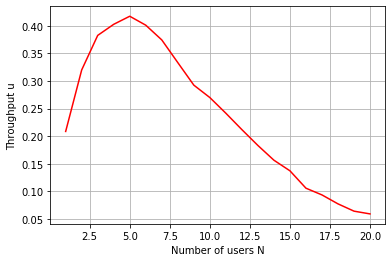

In [8]:
plt.plot(N_vec, throughput_N, 'r-')
plt.xlabel('Number of users N')
plt.ylabel('Throughput u')
plt.grid()
plt.show()

8. Montrez avec une simulation comment le taux d'utilisation optimal (optimal throughput) change avec le nombre des utilisateurs presents, entre $\{1,\ldots, 20\}$? Quelle est la valeur de taux a la limite?

Pour repondre, modifiez le code de Question 7, pour $p[N] = p_{opt}[N]$ ou la probablite change en fonciton de N.

In [9]:
# Initialize global
throughput_opt_N = list()  #resulting optimal throughput vector
# p_opt_vec =??
#
###
### your code here
###

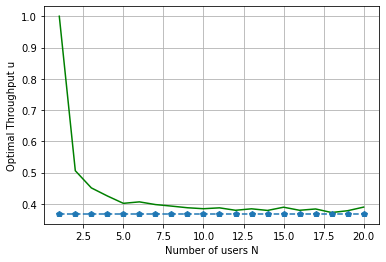

In [10]:
plt.plot(N_vec, throughput_opt_N, 'g-')
plt.plot(N_vec,np.ones(len(N_vec))*np.exp(-1), 'p--')
plt.xlabel('Number of users N')
plt.ylabel('Optimal Throughput u')
plt.grid()
plt.show()

## Exercise 2: ALOHA adaptatif

On considère maintenant un algorithme adaptatif où la probabilité d'emission dépend du nombre de collisions déjà subies. Plus spécifiquement, la probabilité d'emission d'une station est divisée par 2 à chaque collision. On note $p0$ la probabilité d'emission initiale, à la premiére tentative de transmission d'un paquet. On considère le mode synchrone.

1-2. Complétez le programme de simulation permettant d'estimer le débit total du système. Exécutez le programme avec $p0 = 0.2$ et interprétez les résultats.

(*) Question: Quel est le comportement du système quand le nombre N des utilisateurs augmente, avec p0 fixe?

In [22]:
#Parameters
t_max = 10000    #= 1000000       #Simulation time  (with longer option)
t_vec = np.arange(0,t_max)
#
N_max = 20;             #Maximum number of users
N_vec = np.arange(1,N_max+1)
p0 = 0.2

In [23]:
# Initialize global
throughput_A_N = list()
pp_av = list()    # for Question 4
#
for N in N_vec:
    # Initialize local
    nb_packets_A = 0       #cumulative number of successfully transmitted packets
    nb_efforts = np.zeros(N)
    nb_collisions = 0
    p_av = np.zeros(N)
    for t in t_vec:
        ###
        ### your code here
        ### Hint: Create vector of probabilities based on the number of efforts per user. 
        ### Then, check if only 1 packet is transmitted. 
        ### The user of this packet returns to the initial probability state p0.
        ###
    #
    u = nb_packets_A/t_max
    p_av = p_av/t_max      # for Question 4
    pp_av.append(sum(p_av)/N)   # for Question 4
    throughput_A_N.append(u)

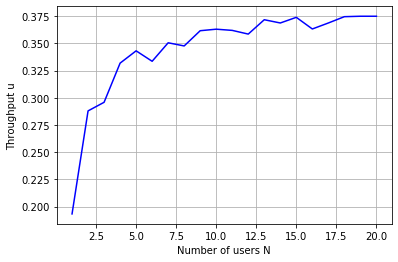

In [24]:
plt.plot(N_vec, throughput_A_N, 'b-')
plt.xlabel('Number of users N')
plt.ylabel('Throughput u')
plt.grid()
plt.show()

3. Comparez le debit total adaptatif avec le résultat obtenu dans le cas ALOHA synchrone, pour $N = 2$, $N = 5$, $N = 20$. Quels sont vos conclusions?

your answer here

4. Fixez $p0=0.2$ et $N=[1,...,Nmax]$. Empiriquement, si 

$\overline{p} = \frac{1}{N\cdot T}\sum_{t=1}^{T}\sum_{n=1}^N p_{t,n}$ 

est la probabilité moyenne de transmission par utilisateur, comparez avec $p^∗[N]=1/N$ (ALOHA synchrone). 
Expliquez vos observations, aussi par rapport au débit total.

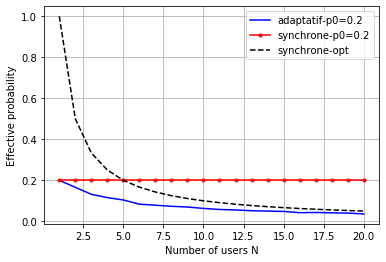

In [25]:
plt.plot(N_vec, pp_av, 'b-',label='adaptatif-p0=0.2')
plt.plot(N_vec, p0*np.ones(len(N_vec)),'r.-',label='synchrone-p0=0.2')
plt.plot(N_vec, 1/N_vec, 'k--',label='synchrone-opt')
plt.ylabel('Effective probability')
plt.xlabel('Number of users N')
plt.legend()
plt.grid()
plt.show()

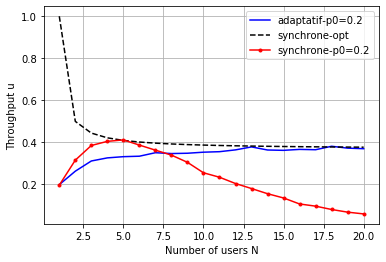

In [143]:
AlohaS = (1-1/N_vec)**(N_vec-1)
plt.plot(N_vec, throughput_A_N2, 'b-',label='adaptatif-p0=0.2')
plt.plot(N_vec,AlohaS, 'k--',label='synchrone-opt')
plt.plot(N_vec,throughput_N,'r.-',label='synchrone-p0=0.2')
plt.ylabel('Throughput u')
plt.xlabel('Number of users N')
plt.legend()
plt.grid()
plt.show()

your answer here

5. Que se passe-t-il lorsque $p0 = 1$? Expliquez ce phénomène.

In [33]:
p0 = 1
###
### your code here
###

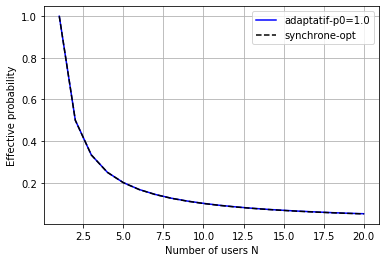

In [34]:
plt.plot(N_vec, pp_av, 'b-',label='adaptatif-p0=1.0')
#plt.plot(N_vec, p0*np.ones(len(N_vec)),'r.-',label='synchrone-p0=1.0')
plt.plot(N_vec, 1/N_vec, 'k--',label='synchrone-opt')
plt.ylabel('Effective probability')
plt.xlabel('Number of users N')
plt.legend()
plt.grid()
plt.show()

your anser here

6. Pour le cas p0=1 et $N=5$ illustrez dans un plot avec axe-x temporaire ($t = 1, . . . , 1000$), les instants d'activité de chaque utilisateur (axe-y $n = 1,...,N$). Modifiez le code pour Question 5.

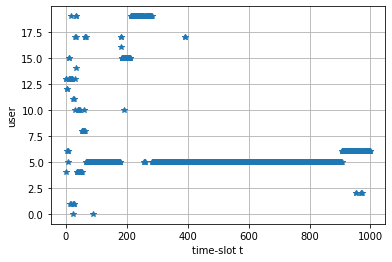

In [36]:
plt.plot(np.arange(1000), user_vec[:1000], '*')
plt.ylabel('user')
plt.xlabel('time-slot t')
plt.grid()
plt.show()

your answer here

7. Illustrez avec une courbe le débit total du systéme en fonction de $p0$, pour $p0 = [0,1]$ (le pas de simulation est $0.1$), et pour $N = 5$, $N = 30$. Quels sont vos conclusions, en observant les plots?

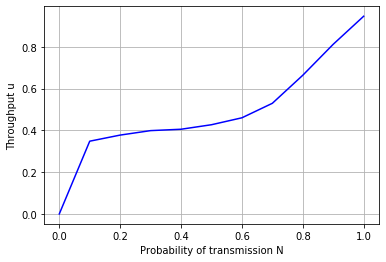

In [46]:
plt.plot(p_vec, throughput_A_p, 'b-')
plt.xlabel('Probability of transmission N')
plt.ylabel('Throughput u')
plt.grid()
plt.show()

your conclusions here

END